In [32]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Yjqh-FlXom-FoFmaS8Xnwlz1LTr6NOj0QdTU-sFK-CIZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'cardiovascularriskprediction-donotdelete-pr-4gf8dce2jghegc'
object_key = 'CVD_cleaned(in).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(1)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12


In [53]:
print("Columns in the dataset:", df_1.columns)

Columns in the dataset: Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'General_Health_Fair', 'General_Health_Good',
       'General_Health_Poor', 'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes',
       'Sex_Male', 'Age_Category_25-29', 'Age_Category_30-34',
       'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49',
       'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64',
       'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79',
       'Age_Category_80+', 'Smoking_Histo

In [54]:
print("Columns in the dataset:", df_1.dtypes)

Columns in the dataset: Height_(cm)                                              int64
Weight_(kg)                                            float64
BMI                                                    float64
Alcohol_Consumption                                      int64
Fruit_Consumption                                        int64
Green_Vegetables_Consumption                             int64
FriedPotato_Consumption                                  int64
General_Health_Fair                                       bool
General_Health_Good                                       bool
General_Health_Poor                                       bool
General_Health_Very Good                                  bool
Checkup_Never                                             bool
Checkup_Within the past 2 years                           bool
Checkup_Within the past 5 years                           bool
Checkup_Within the past year                              bool
Exercise_Yes                   

In [55]:
# Remove any leading/trailing whitespace from column names
df_1.columns = df_1.columns.str.strip()

# Check column names again
print(df_1.columns)


Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'General_Health_Fair', 'General_Health_Good',
       'General_Health_Poor', 'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes',
       'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes',
       'Sex_Male', 'Age_Category_25-29', 'Age_Category_30-34',
       'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49',
       'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64',
       'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79',
       'Age_Category_80+', 'Smoking_History_Yes'],
      dtype='o

In [35]:
df_1 = pd.get_dummies(df_1, drop_first=True)

In [36]:
target_column = 'Heart_Disease_Yes'

In [37]:
X = df_1.drop(target_column, axis=1)
y = df_1[target_column]

In [38]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [43]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [44]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9187159022842434
Confusion Matrix:
[[56439   335]
 [ 4686   311]]
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.99      0.96     56774
        True       0.48      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.70      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771



<Figure size 1000x800 with 0 Axes>

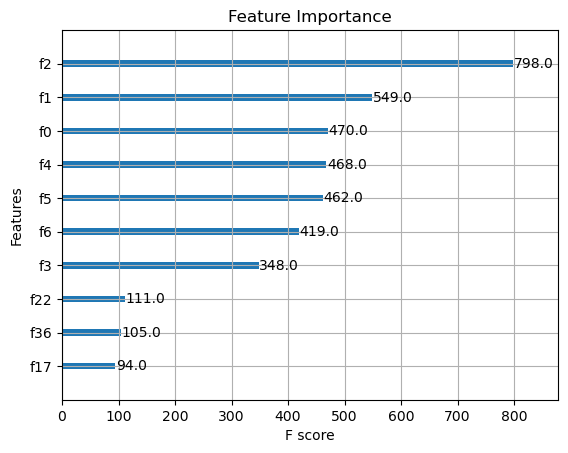

In [45]:
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=10)
plt.title('Feature Importance')
plt.show()

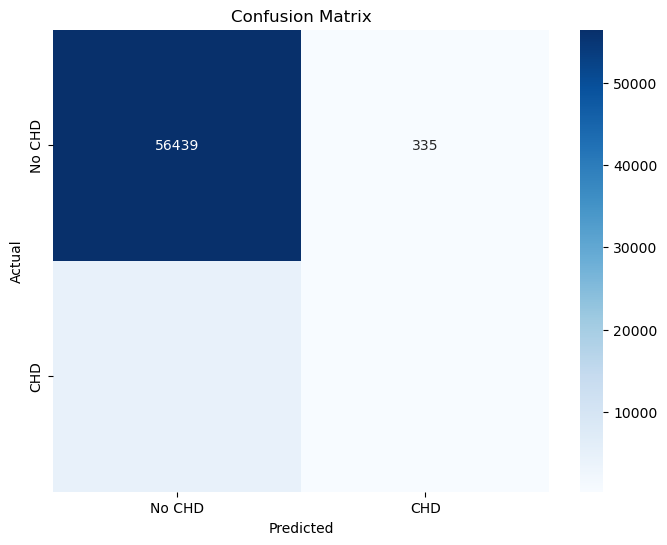

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

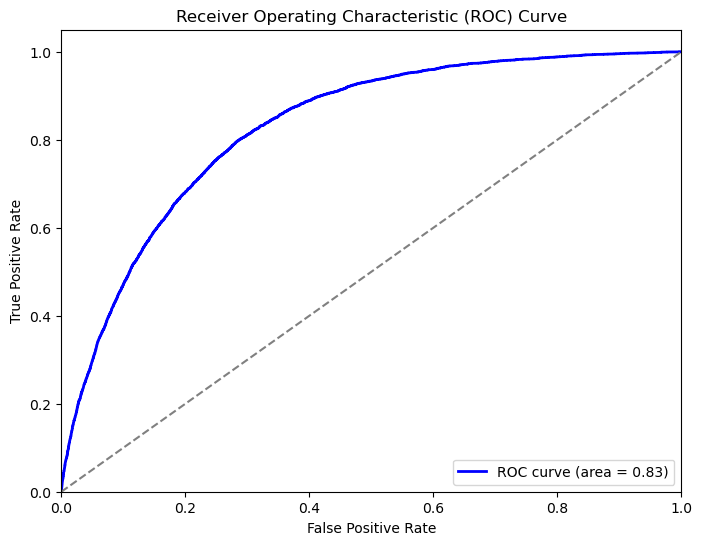

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

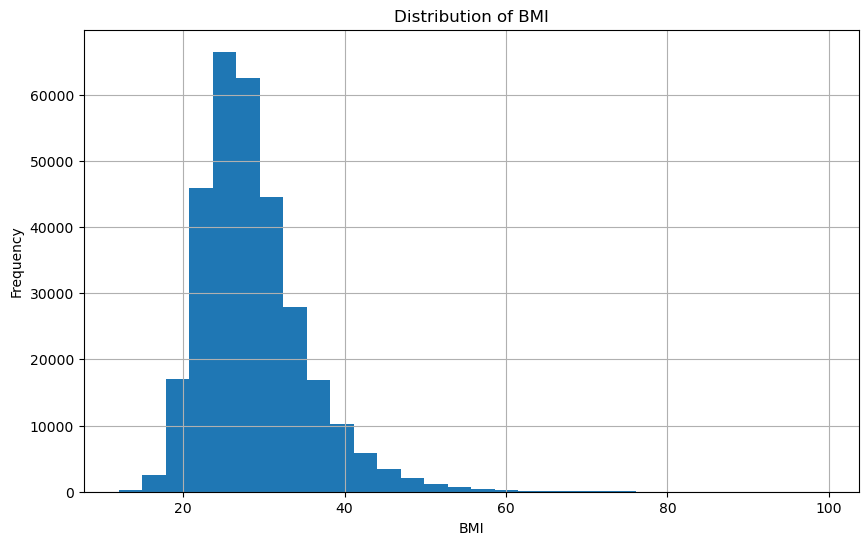

In [48]:
# 1. Histograms
plt.figure(figsize=(10, 6))
df_1['BMI'].hist(bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

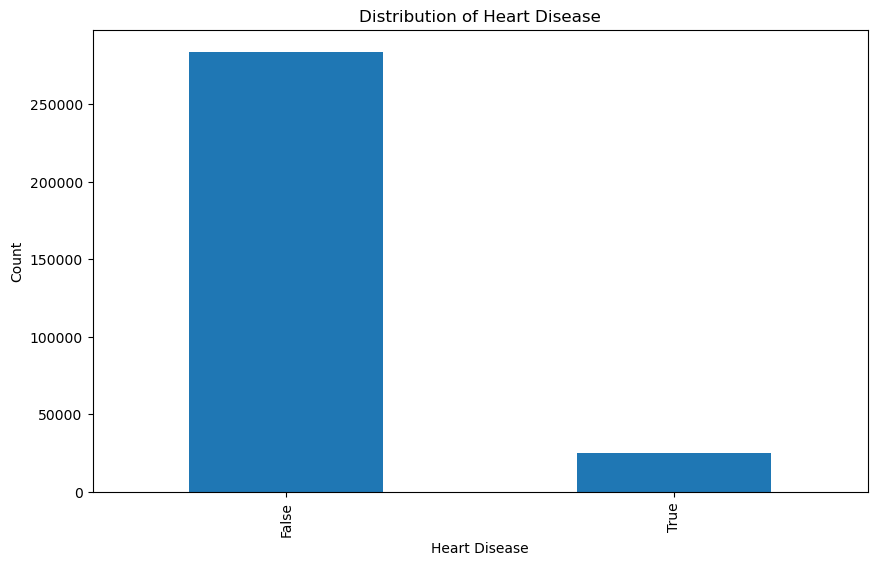

In [57]:
plt.figure(figsize=(10, 6))
df_1['Heart_Disease_Yes'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()